In [15]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()
X = iris_dataset['data']
y = iris_dataset['target']

n_samples, n_features = X.shape

print('Samples:', n_samples)
print('Features:', n_features)

Samples: 150
Features: 4


In [16]:
import numpy as np

print(iris_dataset)

print("--------------------------------")
print(iris_dataset.feature_names)

print("--------------------------------")
print(iris_dataset.target_names)

print("--------------------------------")
print("missing values:", np.isnan(iris_dataset.data).sum())

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
print(X_scaled)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [19]:
def objective_function(X, y, w0, w1, w2):
    y_pred = 10 * w0 - w1 * X[:, 1] + w2 * X[:, 2] 
    error = y - y_pred
    return error

In [20]:
def gradient(X, y, w0, w1, w2):
    n = len(y)
    gradient_w0 = (1 / (5 * n)) * np.sum(objective_function(X, y, w0, w1, w2))
    gradient_w1 = (1 / (5 * n)) * np.sum(objective_function(X, y, w0, w1, w2) * X[:, 1])
    gradient_w2 = (1 / (5 * n)) * np.sum(objective_function(X, y, w0, w1, w2)* X[:, 2])
    return gradient_w0, gradient_w1, gradient_w2

In [21]:
def gradient_descent(X, y, weight0 = 1.0, weight1 = 1.0, weight2 = 1.0,learning_rate=0.01, converge_param = 0.1):
    w0 = weight0
    w1 = weight1
    w2 = weight2
    num_steps = 1
    isConverged = False
    while (not isConverged):
        num_steps +=1
        dw0, dw1, dw2 = gradient(X, y, w0, w1, w2)
        w0 -= learning_rate * dw0
        w1 -= learning_rate * dw1
        w2 -= learning_rate * dw2
        if abs(learning_rate * dw0) < converge_param and abs(learning_rate * dw1) < converge_param and abs(learning_rate * dw2):
           isConverged = True
        weight0 = w0
        weight1 = w1
        weight2 = w2
    print("Converged in " , num_steps,  "iterations...")
    return w0, w1, w2

In [22]:
def gradient_descent_for_plot(X, y, weight0 = 1.0, weight1 = 1.0, weight2 = 1.0,learning_rate=0.01, converge_param = 0.1):
    w0 = weight0
    w1 = weight1
    w2 = weight2
    w0_past = [w0]
    num_steps = 1
    isConverged = False
    while (not isConverged):
        num_steps +=1
        dw0, dw1, dw2 = gradient(X, y, w0, w1, w2)
        w0 -= learning_rate * dw0
        if abs(learning_rate * dw0) < converge_param and abs(learning_rate * dw1) < converge_param and abs(learning_rate * dw2):
           isConverged = True
        w0_past.append(w0)
        weight0 = w0
    print("Converged in " , num_steps,  "iterations...")
    return w0_past

In [23]:
w0, w1, w2 = gradient_descent(X_scaled, y)
print(f"w0: {w0}, w1: {w1}, w2: {w2}")


Converged in  2 iterations...
w0: 1.018, w1: 0.9978398486705484, w2: 1.0013071130348168


Converged in  2 iterations...


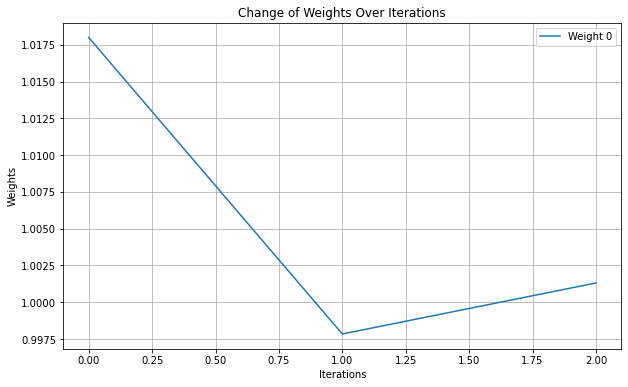

In [24]:
import matplotlib.pyplot as plt
w0_hist = gradient_descent(X_scaled, y)

plt.figure(figsize=(10, 6))
plt.plot(range(len(w0_hist)), w0_hist, label='Weight 0')
plt.xlabel('Iterations')
plt.ylabel('Weights')
plt.title('Change of Weights Over Iterations')
plt.legend()
plt.grid(True)
plt.show()